In [ ]:
#import necessary libraries
import pandas as pd

In [59]:
#import dataset
path = "C:/Users/eliza/Documents/Semester V/Sentiment Analysis/ALL_HEALTHCARE.csv"
healthcare_df = pd.read_csv(path)

C:\Users\eliza\AppData\Local\Temp\ipykernel_12904\426374838.py:3: DtypeWarning: Columns (9,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  healthcare_df = pd.read_csv(path)


In [ ]:
healthcare_df

**ORIGINAL DATA OVERVIEW**  

DATA DIMENSION

In [8]:
num_rows, num_columns = healthcare_df.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 301299 rows and 37 columns.


COLUMN NAMES

In [3]:
healthcare_df.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'resp', 'gmap_id',
       'name_y', 'address', 'description', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC', 'state',
       'relative_results', 'url', 'category_1', 'category_2', 'category_3',
       'category_4', 'category_5', 'category_6', 'category_7', 'category_8',
       'category_9', 'category_10', 'category_11', 'category_12',
       'category_13', 'category_14', 'category_15', 'general_labelling'],
      dtype='object')

SEE DATA TYPES

In [9]:
print(healthcare_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301299 entries, 0 to 301298
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            301299 non-null  float64
 1   name_x             301296 non-null  object 
 2   time               301299 non-null  int64  
 3   rating             301299 non-null  float64
 4   text               301297 non-null  object 
 5   resp               99981 non-null   object 
 6   gmap_id            301299 non-null  object 
 7   name_y             301299 non-null  object 
 8   address            301047 non-null  object 
 9   description        3421 non-null    object 
 10  latitude           301299 non-null  float64
 11  longitude          301299 non-null  float64
 12  category           301299 non-null  object 
 13  avg_rating         301299 non-null  float64
 14  num_of_reviews     301299 non-null  int64  
 15  price              3506 non-null    object 
 16  ho

ACTUAL DATA TYPES

In [60]:
# Summarize the actual data types for each column
for col in healthcare_df.columns:
    print(f"{col}: {set(type(x) for x in healthcare_df[col])}")

user_id: {<class 'float'>}
name_x: {<class 'str'>, <class 'float'>}
time: {<class 'int'>}
rating: {<class 'float'>}
text: {<class 'str'>, <class 'float'>}
resp: {<class 'str'>, <class 'float'>}
gmap_id: {<class 'str'>}
name_y: {<class 'str'>}
address: {<class 'str'>, <class 'float'>}
description: {<class 'str'>, <class 'float'>}
latitude: {<class 'float'>}
longitude: {<class 'float'>}
category: {<class 'str'>}
avg_rating: {<class 'float'>}
num_of_reviews: {<class 'int'>}
price: {<class 'str'>, <class 'float'>}
hours: {<class 'str'>, <class 'float'>}
MISC: {<class 'str'>, <class 'float'>}
state: {<class 'str'>, <class 'float'>}
relative_results: {<class 'str'>, <class 'float'>}
url: {<class 'str'>}
category_1: {<class 'str'>}
category_2: {<class 'str'>, <class 'float'>}
category_3: {<class 'str'>, <class 'float'>}
category_4: {<class 'str'>, <class 'float'>}
category_5: {<class 'str'>, <class 'float'>}
category_6: {<class 'str'>, <class 'float'>}
category_7: {<class 'str'>, <class 'floa

**REDUCED DATASET**

In [ ]:
#taking useful variables only for the text analysis purpose
#the old dataset is not modified at all for future use
modeling_df = healthcare_df[['user_id','name_x','rating','text','gmap_id','name_y']]
#modeling_df.to_csv('pretraining_data.csv', index=False)

IMPORT DATASET

In [62]:
path = "C:/Users/eliza/Documents/Semester V/Sentiment Analysis/pretraining_data.csv"
text_df = pd.read_csv(path)
text_df

,user_id,name_x,rating,text,gmap_id,name_y
0,1.168913e+20,Andrew,5.0,I was shocked when I saw PW had a 2.7 star ave...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
1,1.065142e+20,Oakley Davis,5.0,My experience at Pat Walker was a very good on...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
2,1.089844e+20,sam Rami,1.0,"Here is what they do, you schedule an appointm...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
3,1.000681e+20,Katie McGuffin,5.0,"I’ve been here twice, once for STD testing, an...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
4,1.011815e+20,Dene Wamsley,2.0,I've had very mixed experiences with Pat Walke...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
...,...,...,...,...,...,...
301294,1.009026e+20,Mark S,1.0,Brought my dog in on a Friday because he was v...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic
301295,1.037343e+20,Kaycie LaGrone,1.0,I boarded my dog there while I was on a trip a...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic
301296,1.016109e+20,Edie Chaffin,1.0,I brought my lab there for years. The past yea...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic
301297,1.174574e+20,Jon Goodart,1.0,I would say the coaches and workouts are great...,0x8626a38aeb6e628f:0xce96adca225b4502,Orangetheory Fitness


**DATA DIMENSION**

In [7]:
num_rows, num_columns = text_df.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 301299 rows and 6 columns.


**COLUMN NAMES**

In [14]:
text_df.columns

Index(['user_id', 'name_x', 'rating', 'text', 'gmap_id', 'name_y'], dtype='object')

**COLUMN TYPES**

In [15]:
for col in text_df.columns:
    print(f"{col}: {set(type(x) for x in healthcare_df[col])}")

user_id: {<class 'float'>}
name_x: {<class 'str'>, <class 'float'>}
rating: {<class 'float'>}
text: {<class 'str'>, <class 'float'>}
gmap_id: {<class 'str'>}
name_y: {<class 'str'>}


**CHECK MISSING VALUES**

In [63]:
print(text_df.isnull().sum())

user_id    0
name_x     3
rating     0
text       2
gmap_id    0
name_y     0
dtype: int64


**DROP MISSING VALUES**

In [64]:
text_df = text_df.dropna(subset = ['text'])

In [65]:
text_df = text_df.dropna(subset = ['name_x'])

In [21]:
print(text_df.isnull().sum())

user_id    0
name_x     3
rating     0
text       0
gmap_id    0
name_y     0
dtype: int64


**CHECK VALUES AFTER DROPPING**

In [23]:
text_df.shape

(301294, 6)

**CHECK & REMOVE EXACT DUPLICATED ROWS**

In [31]:
# Display exact duplicate rows
duplicates = text_df[text_df.duplicated(keep=False)]
print(duplicates)


             user_id           name_x  rating  \
0       1.168913e+20           Andrew     5.0   
1       1.065142e+20     Oakley Davis     5.0   
2       1.089844e+20         sam Rami     1.0   
3       1.000681e+20   Katie McGuffin     5.0   
4       1.011815e+20     Dene Wamsley     2.0   
...              ...              ...     ...   
300701  1.161111e+20    Johnny Miller     1.0   
300702  1.087943e+20      Three for T     1.0   
300706  1.087943e+20      Three for T     1.0   
301176  1.072778e+20  Germaine monroe     2.0   
301177  1.072778e+20  Germaine monroe     2.0   

                                                     text  \
0       I was shocked when I saw PW had a 2.7 star ave...   
1       My experience at Pat Walker was a very good on...   
2       Here is what they do, you schedule an appointm...   
3       I’ve been here twice, once for STD testing, an...   
4       I've had very mixed experiences with Pat Walke...   
...                                          

In [66]:
# Count how many times each row is duplicated
duplicate_counts = text_df[text_df.duplicated(keep=False)].groupby(text_df.columns.tolist()).size().reset_index(name='count')
print(duplicate_counts)

           user_id            name_x  rating  \
0     1.000060e+20   Crystal Winston     5.0   
1     1.000120e+20       LAURA TOROK     1.0   
2     1.000124e+20    Erika Mcdonald     1.0   
3     1.000129e+20            Adi Lu     1.0   
4     1.000193e+20  heath hoogshagen     5.0   
...            ...               ...     ...   
4945  1.184312e+20       Steve Koach     5.0   
4946  1.184322e+20     Stanley Crabb     3.0   
4947  1.184334e+20         Jim Geier     5.0   
4948  1.184412e+20   Ginger Bourquin     5.0   
4949  1.184455e+20   Teresa Matthews     5.0   

                                                   text  \
0     Dr. Chet and his staff are awesome! They made ...   
1     Tried to see if we could send our injured work...   
2     Dr. Khan was consistently late (we could alway...   
3     Very BAD experience!!!!\nI waited for over 1.5...   
4            No complaints at all. Enjoy all the staff.   
...                                                 ...   
4945  Prof

Dr. Chet and his staff are awesome! They made me feel comfortable and most importantly my experience was painless. I use to be afraid to go to the dentist but now I love getting my dental care done at Carmichael Dental Care.

Short wait time, nice atmosphere, Dr. Appeared concern. Pleasant and helpful visit.

In [ ]:
duplicated_sen1 = text_df[(text_df['text'] == "Short wait time, nice atmosphere, Dr. Appeared concern. Pleasant and helpful visit.") 
                          & (text_df['text'].duplicated(keep=False))]
print(duplicated_sen1)

             user_id        name_x  rating  \
110877  1.000346e+20  Evelyn Hayws     4.0   
110880  1.000346e+20  Evelyn Hayws     4.0   
111452  1.000346e+20  Evelyn Hayws     4.0   
111455  1.000346e+20  Evelyn Hayws     4.0   

                                                     text  \
110877  Short wait time, nice atmosphere, Dr. Appeared...   
110880  Short wait time, nice atmosphere, Dr. Appeared...   
111452  Short wait time, nice atmosphere, Dr. Appeared...   
111455  Short wait time, nice atmosphere, Dr. Appeared...   

                                      gmap_id                 name_y  
110877  0x88928d99f61618a3:0x3d20e8fd128d6be0  Hassan Kesserwani, MD  
110880  0x88928d99f61618a3:0x3d20e8fd128d6be0  Hassan Kesserwani, MD  
111452  0x88928d99f61618a3:0x3d20e8fd128d6be0  Hassan Kesserwani, MD  
111455  0x88928d99f61618a3:0x3d20e8fd128d6be0  Hassan Kesserwani, MD  


In [37]:
# Filter for records where text is "Great" and it's duplicated
duplicated_sen2 = text_df[(text_df['text'] == "Dr. Chet and his staff are awesome! They made me feel comfortable and most importantly my experience was painless. I use to be afraid to go to the dentist but now I love getting my dental care done at Carmichael Dental Care.") & (text_df['text'].duplicated(keep=False))]
print(duplicated_sen2)

             user_id           name_x  rating  \
151857  1.000060e+20  Crystal Winston     5.0   
151874  1.000060e+20  Crystal Winston     5.0   

                                                     text  \
151857  Dr. Chet and his staff are awesome! They made ...   
151874  Dr. Chet and his staff are awesome! They made ...   

                                      gmap_id  \
151857  0x888c2a6864dfea71:0x7b30669ba35a1b8a   
151874  0x888c2a6864dfea71:0x7b30669ba35a1b8a   

                                                   name_y  
151857  Carmichael Dental Care, Chet Swartzentruber DM...  
151874  Carmichael Dental Care, Chet Swartzentruber DM...  


**DROP EXACT DUPLICATES**

In [70]:
# Remove exact duplicate rows and keep only one occurrence
text_df = text_df.drop_duplicates()

In [40]:
# Reset index after removing duplicates
text_df = text_df.reset_index(drop=True)

In [41]:
# Check for remaining duplicates
print(text_df.duplicated().sum())

0


**CHECK DATA SHAPE AFTER REMOVING DUPLICATES**

In [42]:
text_df.shape

(296287, 6)

**DUPLICATED REVIEW TEXT**

In [43]:
# Count the occurrences of each text value
duplicate_text_counts = text_df['text'].value_counts()

# Filter to show only duplicated texts (those that occur more than once)
duplicate_texts = duplicate_text_counts[duplicate_text_counts > 1]
print(duplicate_texts)

text
Great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 139
Great service                                                                                                            

**data duplication wont be deleted because it have real world meaning** 
If a review like "Great" is posted multiple times by different users, it reflects the true sentiment distribution and should be retained.
User frequency might be important (e.g., if many people say "Great", it indicates popularity). The same review might be posted for different businesses (e.g., a common feedback like "Great service").
If the goal is to analyze business-specific reviews, the context matters, and you might need to keep them.

In [44]:
# Filter for records where text is "Great" and it's duplicated
duplicated_great = text_df[(text_df['text'] == "Great") & (text_df['text'].duplicated(keep=False))]
print(duplicated_great)


             user_id               name_x  rating   text  \
5191    1.137669e+20     Stephen Phillips     5.0  Great   
10360   1.068358e+20      Erica Treadwell     5.0  Great   
19847   1.126386e+20         david morgan     4.0  Great   
21460   1.170148e+20        Marvin Risley     5.0  Great   
22277   1.106720e+20          Linda Hayes     5.0  Great   
...              ...                  ...     ...    ...   
224346  1.111767e+20           Jay Mittal     5.0  Great   
224355  1.086875e+20         Abdul Rehman     5.0  Great   
224944  1.134910e+20  Marvin Marvinquincy     5.0  Great   
224961  1.098925e+20         Keith Teague     4.0  Great   
234714  1.070992e+20        wayne osborne     2.0  Great   

                                      gmap_id  \
5191    0x87c9696c2590d237:0x40132fe87e7441c6   
10360   0x87d2125c07d76ba7:0x6aaef6019671063c   
19847   0x87d42f31147c34cf:0x15ce4018734a154a   
21460   0x87c910f9a223c7cf:0x8b461dad2e29b751   
22277   0x86346b7461afe153:0x536b6

CORRECT DATA TYPES

In [45]:
text_df

,user_id,name_x,rating,text,gmap_id,name_y
0,1.168913e+20,Andrew,5.0,I was shocked when I saw PW had a 2.7 star ave...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
1,1.065142e+20,Oakley Davis,5.0,My experience at Pat Walker was a very good on...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
2,1.089844e+20,sam Rami,1.0,"Here is what they do, you schedule an appointm...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
3,1.000681e+20,Katie McGuffin,5.0,"I’ve been here twice, once for STD testing, an...",0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
4,1.011815e+20,Dene Wamsley,2.0,I've had very mixed experiences with Pat Walke...,0x87c96ee6220bff3d:0x3ba603ed95a0b0ca,Pat Walker Health Center
...,...,...,...,...,...,...
296282,1.009026e+20,Mark S,1.0,Brought my dog in on a Friday because he was v...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic
296283,1.037343e+20,Kaycie LaGrone,1.0,I boarded my dog there while I was on a trip a...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic
296284,1.016109e+20,Edie Chaffin,1.0,I brought my lab there for years. The past yea...,0x8626ba564f365f59:0x7e6e5bdbec491a49,Azalea Lakes Veterinary Clinic
296285,1.174574e+20,Jon Goodart,1.0,I would say the coaches and workouts are great...,0x8626a38aeb6e628f:0xce96adca225b4502,Orangetheory Fitness


User id = float  
Name = string, float (needs to check)  
Rating = float  
Text = string, float (needs to check)  
Gmapsid = string  
Name business = string  

In [48]:
# Convert 'user_id' to string if it represents IDs
text_df['user_id'] = text_df['user_id'].astype(str)

# Convert 'name_x' and 'name_y' to string, replacing NaN with empty string
text_df['name_x'] = text_df['name_x'].fillna('').astype(str)
text_df['name_y'] = text_df['name_y'].fillna('').astype(str)

# Ensure 'text' column is string
text_df['text'] = text_df['text'].astype(str)



**CHECK FOR UNIQUE VALUES**

In [49]:
print(text_df.nunique())

user_id    268933
name_x     243801
rating          5
text       290838
gmap_id     12582
name_y      10938
dtype: int64


visualize distribution of ratings

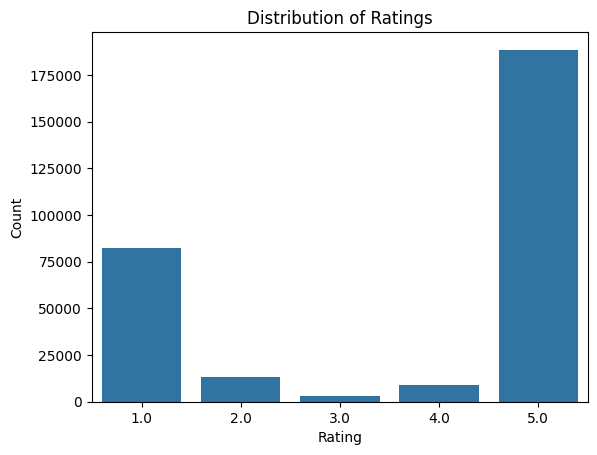

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=text_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

check text length distribution  
new text_length column will be created

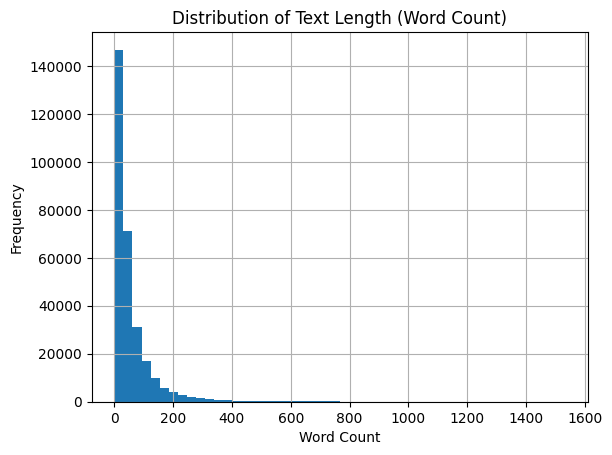

In [51]:
text_df['text_length'] = text_df['text'].apply(lambda x: len(x.split()))
text_df['text_length'].hist(bins=50)
plt.title('Distribution of Text Length (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

change 
name_x = user_name  
name_y = business_name

In [52]:
# Rename columns 'name_x' to 'user_name' and 'name_y' to 'business_name'
text_df = text_df.rename(columns={'name_x': 'user_name', 'name_y': 'business_name'})

In [53]:
text_df.columns

Index(['user_id', 'user_name', 'rating', 'text', 'gmap_id', 'business_name',
       'text_length'],
      dtype='object')

In [ ]:
text_df

**detect short reviews or low-information reviews**

In [56]:
# Check for reviews with very few words
print(text_df[text_df['text_length'] < 3])

                       user_id         user_name  rating               text  \
259     1.1202676015726368e+20       Julie Hobbs     5.0         Love them!   
272      1.136977885874749e+20     Anthony Hunte     5.0      Great service   
277     1.0564665754986724e+20       Tom Rudolph     5.0   Fantastic staff!   
412     1.0984374714728129e+20    Dexter the Cat     5.0  Fantastic staff!!   
420     1.1456840379011105e+20       Mary Arthur     5.0       Thank y’all!   
...                        ...               ...     ...                ...   
295919  1.0944652243267265e+20    Albaron Jmoney     1.0            To much   
296001  1.0369253517688632e+20  Joseph Barksdale     1.0           Terrible   
296239  1.1061529327686964e+20    Kelsey Hickman     1.0           Horrible   
296243  1.1564896847484436e+20        Sara Brice     1.0         Poor care.   
296244   1.118533938982355e+20      James Reeser     1.0               Slow   

                                      gmap_id  \
25

**save cleaned data**

In [57]:
text_df.to_csv('cleaned_healthcare_data.csv', index = False)